# **7.1. From Fully Connected Layers to Convolutions**

##Discussion Message:

How can we make model to recognize not only local features but also global features which can't be identified by only some part of image?

# **7.2. Convolutions for Images**




In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.1 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.0 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def corr2d(X, K):
  h, w = K.shape
  Y = torch.zeros((X.shape[0] - h+1, X.shape[1] - w+1 ))
  for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
      Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
  return Y

In [ ]:
X = torch.tensor([[0.0,1.0,2.0],[3.0,4.0,5.0],[6.0,7.0,8.0]])
K = torch.tensor([[0.0,1.0],[2.0,3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

In [ ]:
class Conv2D(nn.Module):
  def __init__(self, kernel_size):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(kernel_size))
    self.bias = nn.Parameter(torch.zeros(1))
  def forward(self, x):
    return corr2d(x, self.weight) + self.bias


In [ ]:
X = torch.ones((6,8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [ ]:
K = torch.tensor([[1.0,-1.0]])

In [ ]:
Y = corr2d(X,K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [ ]:
corr2d(X.t(),K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
conv2d = nn.LazyConv2d(1,kernel_size=(1,2),bias = False)
X = X.reshape((1,1,6,8))
Y = Y.reshape((1,1,6,7))
lr = 3e-2

for i in range(10):
  Y_hat = conv2d(X)
  l = (Y_hat - Y) ** 2
  conv2d.zero_grad()
  l.sum().backward()
  conv2d.weight.data[:] -= lr * conv2d.weight.grad
  if (i+1)%2 == 0:
    print(f'epoch {i+1}, loss {l.sum():.3f}')

epoch 2, loss 12.415
epoch 4, loss 2.540
epoch 6, loss 0.614
epoch 8, loss 0.180
epoch 10, loss 0.062


In [ ]:
print(conv2d.weight.data.reshape((1,2)))

tensor([[ 0.9947, -0.9828]])


##Discussion Message:

How can we make the model detect both horizontal and vertical edges?  
It must be sum of the result of two different kernel, [1,-1] and [[1],[-1]].  
However, it may have problem of pixel size difference. How to fix it?

# **7.3. Padding and Stride**

In [ ]:
import torch
from torch import nn

In [ ]:
def comp_conv2d(conv2d,X):
  X = X.reshape((1,1) + X.shape)
  Y = conv2d(X)
  return Y.reshape(Y.shape[2:])

conv2d = nn.LazyConv2d(1,kernel_size=3,padding=1)
X = torch.rand(size=(8,8))
comp_conv2d(conv2d,X).shape

torch.Size([8, 8])

In [ ]:
conv2d = nn.LazyConv2d(1,kernel_size=(5,3),padding=(2,1))
comp_conv2d(conv2d,X).shape

torch.Size([8, 8])

In [ ]:
conv2d = nn.LazyConv2d(1,kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d,X).shape

torch.Size([4, 4])

In [ ]:
conv2d = nn.LazyConv2d(1,kernel_size=(3,5),padding=(0,1),stride=(3,4))
comp_conv2d(conv2d,X).shape

torch.Size([2, 2])

##Discussion Message:
How can we find the appropriate stride size which have the best performance?

# **7.4. Multiple Input and Multiple Output Channels**




In [ ]:
import torch
from d2l import torch as d2l

In [ ]:
def corr2d_multi_in(X,K):
  return sum(d2l.corr2d(x,k) for x,k in zip(X,K))

In [ ]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

In [ ]:
def corr2d_multi_in_out(X,K):
  return torch.stack([corr2d_multi_in(X,k) for k in K],0)

In [ ]:
K = torch.stack((K,K+1,K+2),0)
K.shape

torch.Size([3, 2, 2, 2])

In [ ]:
corr2d_multi_in_out(X,K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

1x1 Convolutional Layer

In [ ]:
def corr2d_multi_in_out_1x1(X,K):
  c_i, h, w = X.shape
  c_o = K.shape[0]
  X = X.reshape((c_i, h*w))
  K = K.reshape((c_o, c_i))

  Y = torch.matmul(K,X)
  return Y.reshape((c_o,h,w))

In [ ]:
X = torch.normal(0,1,(3,3,3))
K = torch.normal(0,1,(2,3,1,1))
Y1 = corr2d_multi_in_out_1x1(X,K)
Y2 = corr2d_multi_in_out(X,K)
assert float(torch.abs(Y1-Y2).sum()) < 1e-6

##Discussion Message:
1x1 Layer is actually 1x1xn Layer. When does we use 1x1 Convolution Layers?  
What about using sigmoid or ReLU function right after the 1x1 Layers?

# **7.5. Pooling**




In [ ]:
def pool2d(X,pool_size,mode='max'):
  p_h, p_w = pool_size
  Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1]-p_w+1))
  for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
      if mode == 'max':
        Y[i,j] = X[i:i+p_h,j:j+p_w].max()
      elif mode == 'avg':
        Y[i,j] = X[i:i+p_h,j:j+p_w].mean()
  return Y

In [ ]:
X = torch.tensor([[0.0,1.0,2.0],[3.0,4.0,5.0],[6.0,7.0,8.0]])
pool2d(X,(2,2))

tensor([[4., 5.],
        [7., 8.]])

In [ ]:
pool2d(X,(2,2),'avg')

tensor([[2., 3.],
        [5., 6.]])

In [ ]:
X = torch.arange(16,dtype=torch.float32).reshape((1,1,4,4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3,padding=1,stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [ ]:
X = torch.cat((X,X+1),1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3,padding=1,stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

##Discussion Message:
I believe that pooling is useful to identify two features: specific information and overall shape.  
Maxpooling could be useful to identify some specific features.  
Average pooling could be useful to understand the overall shape.

# **7.6. Convolutional Neural Networks(LeNet)**




In [ ]:
def init_cnn(module):
  if type(module) == nn.Linear or type(module) == nn.Conv2d:
    nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):
  def __init__(self,lr=0.1,num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(6,kernel_size=5,padding=2),nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2,stride=2),
        nn.LazyConv2d(16, kernel_size = 5), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.Sigmoid(),
        nn.LazyLinear(84), nn.Sigmoid(),
        nn.LazyLinear(num_classes)
    )

In [ ]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self,X_shape):
  X = torch.randn(*X_shape)
  for layer in self.net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

model = LeNet()
model.layer_summary((1,1,28,28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


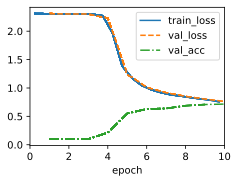

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

##Discussion Message:
Nevertheless the CNN model only uses convolution layers and pooling layers, how could the model identify the separated feature in image ? For example, there could be image with sky separated by buildings. Then How could the model identify the sky image?


# **8.2. Networks Using Blocks(VGG)**




In [8]:
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
def vgg_block(num_convs, out_channels):
  layers = []
  for _ in range(num_convs):
    layers.append(nn.LazyConv2d(out_channels,kernel_size=3,padding=1))
    layers.append(nn.ReLU())
  layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
  return nn.Sequential(*layers)

In [10]:
class VGG(d2l.Classifier):
  def __init__(self,arch,lr = 0.1, num_classes = 10):
    super().__init__()
    self.save_hyperparameters()
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in arch:
      conv_blks.append(vgg_block(num_convs,out_channels))
    self.net = nn.Sequential(
        *conv_blks, nn.Flatten(),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
        nn.LazyLinear(num_classes)
    )
    self.net.apply(d2l.init_cnn)


In [11]:
VGG(arch = ( (1,64),(1,128),(2,256),(2,512),(2,512) )).layer_summary((1,1,224,224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [12]:
model = VGG(arch = ( (1,16),(1,32),(2,64),(2,128),(2,128) ),lr=0.01)
trainer = d2l.Trainer(max_epochs = 10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128,resize=(224,224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]],d2l.init_cnn)

100%|██████████| 26421880/26421880 [00:09<00:00, 2761288.47it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209732.25it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:05<00:00, 748397.29it/s] 


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16558494.63it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


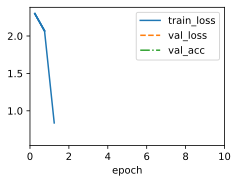

In [ ]:
trainer.fit(model,data)

## Disussion Message
There are dropout layers on the last step of the VGG network. What is dropout layer?  
  
-> There are some information about dropout method from Google.  
The dropout technique is turning off the random connection of layer to prevent overfitting problem.

# **8.6. Residual Networks(ResNet) and ResNeXt**




In [1]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.3 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.0 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Unin

In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [2]:
class Residual(nn.Module):
  def __init__(self,num_channels,use_1x1conv = False, strides = 1):
    super().__init__()
    self.conv1 = nn.LazyConv2d(num_channels,kernel_size=3,padding=1,stride=strides)
    self.conv2 = nn.LazyConv2d(num_channels,kernel_size=3,padding=1)
    if use_1x1conv:
      self.conv3 = nn.LazyConv2d(num_channels,kernel_size=1,stride=strides)
    else:
      self.conv3 = None
    self.bn1 = nn.LazyBatchNorm2d()
    self.bn2 = nn.LazyBatchNorm2d()
  def forward(self,X):
    Y = F.relu(self.bn1(self.conv1(X)))
    Y = self.bn2(self.conv2(Y))
    if self.conv3:
      X = self.conv3(X)
    Y+=X
    return F.relu(Y)


In [3]:
blk = Residual(3)
X = torch.rand(4,3,6,6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [4]:
blk = Residual(6,use_1x1conv=True,strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

In [5]:
class ResNet(d2l.Classifier):
  def b1(self):
    return nn.Sequential(
        nn.LazyConv2d(64,kernel_size=7,stride=2,padding=3),
        nn.LazyBatchNorm2d(),nn.ReLU(),
        nn.MaxPool2d(kernel_size=3,stride=2,padding=1)
    )

In [6]:
@d2l.add_to_class(ResNet)
def block(self,num_residuals, num_channels, first_block=False):
  blk = []
  for i in range (num_residuals):
    if i == 0 and not first_block:
      blk.append(Residual(num_channels,use_1x1conv=True,strides=2))
    else:
      blk.append(Residual(num_channels))
  return nn.Sequential(*blk)

In [7]:
@d2l.add_to_class(ResNet)
def __init__(self,arch,lr=0.1,num_classes=10):
  super(ResNet,self).__init__()
  self.save_hyperparameters()
  self.net = nn.Sequential(self.b1())
  for i,b in enumerate(arch):
    self.net.add_module(f'b{i+2}',self.block(*b,first_block=(i==0)))
  self.net.add_module('last',nn.Sequential(
      nn.AdaptiveAvgPool2d((1,1)),nn.Flatten(),
      nn.LazyLinear(num_classes)
  ))
  self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__(((2,64),(2,128),(2,256),(2,512)),lr,num_classes)

ResNet18().layer_summary((1,1,96,96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


In [ ]:
model = ResNet18(lr = 0.01)
trainer = d2l.Trainer(max_epochs = 10, num_gpus = 1)
data = d2l.FashionMNIST(batch_size = 128, resize = (96,96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]],d2l.init_cnn)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


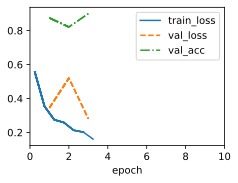

In [ ]:
trainer.fit(model,data)

In [ ]:
class ResNeXtBlock(nn.Module):
  def __init__(self,num_channels,groups,bot_mul,use_1x1conv = False, strides = 1):
    super().__init__()
    bot_channels = int(round(num_channels*bot_mul))
    self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
    self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3, stride=strides, padding=1, groups=bot_channels//groups)
    self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
    self.bn1 = nn.LazyBatchNorm2d()
    self.bn2 = nn.LazyBatchNorm2d()
    self.bn3 = nn.LazyBatchNorm2d()
    if use_1x1conv:
      self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1, stride=strides)
      self.bn4 = nn.LazyBatchNorm2d()
    else:
      self.conv4 =None
    def forward(self,X):
      Y = F.relu(self.bn1(self.conv1(X)))
      Y = F.relu(self.bn2(self.conv2(Y)))
      Y = self.bn3(self.conv3(Y))
      if self.conv4:
        X = self.bn4(self.conv4(X))
      return F.relu(Y+X)

In [ ]:
blk = ResNeXtBlock(32,16,1)
X = torch.randn(4,32,96,96)
blk(X).shape

##Dicussion Message
It took more time to train ResNet, and it would be the result of complexity of the model. Chances are that ResNeXt consume more time than ResNet because ResNeXt has higher number of hyperparameters.
Then, how can we deal with increasing number of hyperparameters and time consumption?